In [ ]:
import re
import torch
import pandas as pd
import numpy as np
import pandas as pd

In [ ]:
pip install spacy_langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 998.1/998.1 kB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993410 sha256=064f0cbc4b1066fa3bdc3419c975ac86d782e8b00a38c61bafc0aa75a0da9669
  Stored in directory: /root/.cache/pip/wheels/97/f1/e4/8b73f7a0421b132755956892d29b1e764d3e0857a6e92e32fe
Successfully built langdetect


In [ ]:
import matplotlib.pyplot as plt
from spacy.language import Language
import spacy
from spacy_langdetect import LanguageDetector

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

import warnings
warnings.simplefilter('ignore')

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(f"Setting device to '{device}'")

Setting device to 'cuda'


In [ ]:
from google.colab import drive
import json

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time

df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df_news_final_project.shape

CPU times: user 7.63 s, sys: 6.45 s, total: 14.1 s
Wall time: 1min 7s


(200588, 5)

In [ ]:
# Inspect the First Few Rows:
df_news_final_project.head()

,url,date,language,title,text
0,http://spaceref.com/astronomy/observation-simulation-and-ai-join-forces-to-reveal-a-clear-universe.html,2021-07-05,en,"Observation, Simulation, And AI Join Forces To Reveal A Clear Universe - SpaceRef","\n\nObservation, Simulation, And AI Join Forces To Reveal A Clear Universe - SpaceRef\n\n \nHome |\nNASA Watch\nSpaceRef Business\nAstrobiology Web\nAdvertising\nAdd an Event\nSign up for our Daily Newsletter \n\n \n\n\nInternational Space Station\nNASA Hack Space\nCalendar\nMissions\nSpace Weather \n \n \nObservation, Simulation, And AI Join Forces To Reveal A Clear Universe\n\n\n Press Release - Source: NATIONAL INSTITUTES OF NATURAL SCIENCES..."
1,http://www.agoravox.it/Covid-19-un-messaggio-dai.html,2020-03-13,en,Covid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia,\n\n\nCovid-19: un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia\n\nAccedi\n\nPartecipa ad AgoraVox!\nIscriviti e proponi un articolo\nHome page\n\n\nAttualitÃ \n\n\nAmbiente\nCronaca\nCronaca Locale\nCultura\nEconomia\nEuropa\nMedia\nIstruzione\nMondo\nPolitica\nSalute\nReligione\nSocietÃ \nScienza e Tecnologia\nTribuna Libera\n\n\tDi' la tua\n\n\nTempo Libero\n\n\nGossip\nRedazionali\nConcorsi\nCinema\nFame&Tulipani\nIncredibile ma vero!\nLa vignetta del giorno...
2,http://www.dataweek.co.za/21690r,2024-04-05,en,Flash for AI - 28 March 2024 - EBV Electrolink - Dataweek,"\nFlash for AI - 28 March 2024 - EBV Electrolink - Dataweek\nHome\nAbout us\nBack issues / E-book / PDF\nSubscribe\nAdvertise\n\n \n\nEMP Handbook\n\nCategories\n\n▸ Editor's Choice\n▸ Multimedia, Videos\n▸ AI & ML\n▸ Analogue, Mixed Signal, LSI\n▸ Circuit & System Protection\n▸ Computer/Embedded Technology\n▸ Design Automation\n▸ DSP, Micros & Memory\n▸ Edge Computing & IIoT\n▸ Electronics Technology\n▸ Enclosures, Racks, Cabinets & Panel Products\n▸ Events\n▸ Interconnection\n▸ Manufacturi..."
3,http://www.envirolink.org/2021/03/11/hundreds-of-sewage-leaks-detected-thanks-to-ai/,2021-03-11,en,Hundreds of sewage leaks detected thanks to AI - EnviroLink Network,"\nHundreds of sewage leaks detected thanks to AI - EnviroLink Network\n\n Home\nEnviroLink Forum\nAbout EnviroLink\nThursday, 11 March 2021\n\n\nYou are here:\nHome\n 2021\n March\n 11\n Hundreds of sewage leaks detected thanks to AI\nHundreds of sewage leaks detected thanks to AI\n\nPosted on March 11, 2021 by EnviroLink Editor\n|\n0 Comments\n\n\n \n\nFrom BBC \nShareclose\nShare pageCopy linkAbout sharing\nimage copyrightRivers Trust\n\nHundreds of previously unreported releases of raw se..."
4,http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926,2020-08-07,en,Two dead as AI Express flight skids off Kozhikode airport,Two dead as AI Express flight skids off Kozhikode airportTopLoginSubscribeToggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGlobal EyeInlandRoutesBeaconInsightGame OnSafariTrendingCandid TalkGastronomyFact FilesMapping the states of IndiaX/sunday-post/beyond-bygone/sunday-post/epic-power/fact-files/ians-feeds/sundaypost/in-retrospect/mapping-the-states-of-india/puja-special/Reminiscence/sponsored/sundaypost/global-eye/feat...


In [ ]:
# Dataset Information:
df_news_final_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200588 entries, 0 to 200587
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   url       200588 non-null  object
 1   date      200588 non-null  object
 2   language  200588 non-null  object
 3   title     200588 non-null  object
 4   text      200588 non-null  object
dtypes: object(5)
memory usage: 7.7+ MB


In [ ]:
df_news_final_project.describe()

,url,date,language,title,text
count,200588,200588,200588,200588,200588
unique,200588,1769,1,154709,200016
top,http://spaceref.com/astronomy/observation-simulation-and-ai-join-forces-to-reveal-a-clear-universe.html,2024-03-01,en,Virtus Artificial Intelligence &amp; Technology Opportunities Fund Discloses Sources of Distribution - Section 19(a) Notice,Accelerate the Development of AI Applications | Scale AI
freq,1,1948,200588,89,8


In [ ]:
# Find missing values
df_news_final_project.isnull().sum()

,0
url,0
date,0
language,0
title,0
text,0


In [ ]:
# Check the first article title
df_news_final_project['title'][0]

'Observation, Simulation, And AI Join Forces To Reveal A Clear Universe - SpaceRef'

In [ ]:
# Check the first article text
df_news_final_project['text'][0]

'\n\nObservation, Simulation, And AI Join Forces To Reveal A Clear Universe - SpaceRef\n\n \nHome |\nNASA Watch\nSpaceRef Business\nAstrobiology Web\nAdvertising\nAdd an Event\nSign up for our Daily Newsletter \n\n \n\n\nInternational Space Station\nNASA Hack Space\nCalendar\nMissions\nSpace Weather \n             \xa0             \n           \nObservation, Simulation, And AI Join Forces To Reveal A Clear Universe\n\n\n             Press Release - Source: NATIONAL INSTITUTES OF NATURAL SCIENCES\n             \n            \nPosted July  4, 2021 10:00 PM\n View Comments\nUsing AI driven data analysis to peel back the noise and find the actual shape of the Universe. CREDIT The Institute of Statistical Mathematics\nJapanese astronomers have developed a new artificial intelligence (AI) technique to remove noise in astronomical data due to random variations in galaxy shapes.\nAfter extensive training and testing on large mock data created by supercomputer simulations, they then applied thi

The clean_text function performs text preprocessing by:

- Removing URLs from the text.

- Keeping only specific characters: alphabets, digits, spaces, single quotes, hyphens, and periods, while removing any other characters.

- Removing extra whitespace: converting multiple spaces, tabs, or newlines to a single space and trimming leading/trailing spaces.

This function prepares text for cleaner, standardized analysis or further processing.

In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove characters not in the specified set (alphabets, digits, spaces, single quotes, hyphens, and periods)
    text = re.sub(r'[^A-Za-z0-9\s\'\-\.]', '', text)

    # Remove extra spaces, tabs, and newlines
    text = re.sub(r'\s+', ' ', text).strip()  # Convert multiple spaces, tabs, or newlines to a single space and trim

    return text

In [ ]:
# Make a copy of df_news_final_project
df = df_news_final_project.copy()

In [ ]:
# Apply clean_text to title
df['title'] = df['title'].apply(clean_text)

In [ ]:
# Apply clean_text to text
df['text'] = df['text'].apply(clean_text)

In [ ]:
# Check the cleaned title
df['title'][0]

'Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef'

In [ ]:
# Check the cleaned text
df['text'][0]

"Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef Home NASA Watch SpaceRef Business Astrobiology Web Advertising Add an Event Sign up for our Daily Newsletter International Space Station NASA Hack Space Calendar Missions Space Weather Observation Simulation And AI Join Forces To Reveal A Clear Universe Press Release - Source NATIONAL INSTITUTES OF NATURAL SCIENCES Posted July 4 2021 1000 PM View Comments Using AI driven data analysis to peel back the noise and find the actual shape of the Universe. CREDIT The Institute of Statistical Mathematics Japanese astronomers have developed a new artificial intelligence AI technique to remove noise in astronomical data due to random variations in galaxy shapes. After extensive training and testing on large mock data created by supercomputer simulations they then applied this new tool to actual data from Japan's Subaru Telescope and found that the mass distribution derived from using this method is consistent with t

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200588 entries, 0 to 200587
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   url       200588 non-null  object
 1   date      200588 non-null  object
 2   language  200588 non-null  object
 3   title     200588 non-null  object
 4   text      200588 non-null  object
dtypes: object(5)
memory usage: 7.7+ MB


### Exclude failed web crawl patterns

In [ ]:
# Exclude rows with failed web crawl patterns
failed_web_crawls_patterns = [
    r'404 Not Found|500 Internal Server Error',
    r'Content loading failed|This content is not available|Lorem ipsum',
    r'You are being redirected|Click here if you are not redirected',
    r'Please login|Register to view|Subscription required',
    r'bot detected|prove you are not a robot|CAPTCHA',
    r'<script.*?</script>|<style.*?</style>|404 Error|Page not found|Error loading'
]

In [ ]:
failed_web_crawls_combined_patterns = '|'.join(failed_web_crawls_patterns)

In [ ]:
failed_web_crawls_combined_patterns

'404 Not Found|500 Internal Server Error|Content loading failed|This content is not available|Lorem ipsum|You are being redirected|Click here if you are not redirected|Please login|Register to view|Subscription required|bot detected|prove you are not a robot|CAPTCHA|<script.*?</script>|<style.*?</style>|404 Error|Page not found|Error loading'

Case-insensitive: The search will match patterns regardless of the case of the letters.

Regex-enabled: The patterns will be interpreted as regular expressions, allowing for advanced matching like alternations (|), groups, or wildcards.

In [ ]:
df = df[~df['text'].str.contains(failed_web_crawls_combined_patterns, case=False, regex=True, na=False)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195757 entries, 0 to 200587
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   url       195757 non-null  object
 1   date      195757 non-null  object
 2   language  195757 non-null  object
 3   title     195757 non-null  object
 4   text      195757 non-null  object
dtypes: object(5)
memory usage: 9.0+ MB


### Discard Irrelevant Articles

In [ ]:
# Focus on the "text" column
# Count the number of tokens in each row under "text"
# Put the count under a new column "token_count"
df['token_count'] = df['text'].apply(lambda x: len(x.split()))

In [ ]:
df['token_count'].describe()

,token_count
count,195757.000000
mean,1169.056284
std,1019.413783
min,3.000000
25%,684.000000
50%,984.000000
75%,1452.000000
max,131326.000000


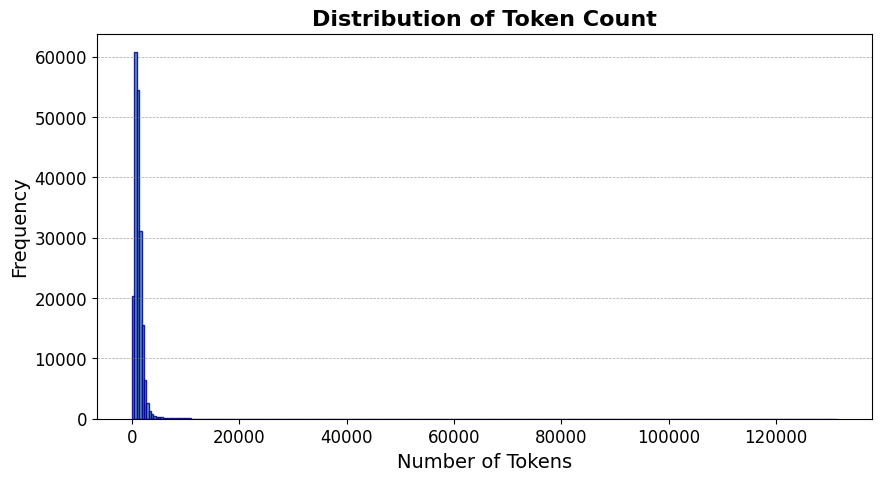

In [ ]:
# Plot the histogram of the 'token_count' column
plt.figure(figsize=(10, 5))
plt.hist(df['token_count'], bins=300, color='steelblue', edgecolor='darkblue', alpha=0.85)
plt.title('Distribution of Token Count', fontsize=16, fontweight='bold')
plt.xlabel('Number of Tokens', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
# Calculate token count distribution in bins of 100
token_count_bins = pd.cut(df['token_count'], bins=range(0, df['token_count'].max() + 100, 100))
token_count_distribution = df['token_count'].groupby(token_count_bins).count()

# Display the distribution
print(token_count_distribution)

token_count
(0, 100]            9383
(100, 200]          3055
(200, 300]          2415
(300, 400]          3332
(400, 500]          6299
                    ... 
(130900, 131000]       0
(131000, 131100]       0
(131100, 131200]       0
(131200, 131300]       0
(131300, 131400]       1
Name: token_count, Length: 1314, dtype: int64


In [ ]:
# Calculate the 5.0% and 95.0% percentiles of the 'token_count' column
lower_percentile = df['token_count'].quantile(0.05)
upper_percentile = df['token_count'].quantile(0.95)

print('lower count: ', round(lower_percentile, 1))
print('upper count: ', round(upper_percentile, 1))

lower count:  108.0
upper count:  2396.0


### The Token Count distribution is right-skewed, indicating that articles with extremely high Token Counts require more processing time and should be excluded. Likewise, articles with very low Token Counts are excluded as they often lack sufficient information. As a result, the top and bottom 5% of articles by Token Count are removed from the analysis.

In [ ]:
# Filter the DataFrame based on the percentile range
df = df[(df['token_count'] >= lower_percentile) & (df['token_count'] <= upper_percentile)]

The **flag_rows_by_word function** flags rows in a DataFrame based on whether specific words or phrases appear within a certain percentage of the beginning of a text column. This function is useful for identifying rows that contain relevant keywords early in their text, which might indicate specific content or intent.

**Parameters**

df: The DataFrame containing the data.

column_name: The name of the column in df where the text is stored.

rel_words: A list of relevant words or phrases to search for in the text.

percentage: The percentage of the text (starting from the beginning) within which the function will search for the relevant words.

The function returns the DataFrame with an added rel_flag column, where:

- 1 indicates that at least one relevant word was found within the specified part of the text.
- 0 indicates no relevant words were found in that part.

In [ ]:
def flag_rows_by_word(df, column_name, rel_words, percentage):
    def check_presence_in_part(text, words, percentage):
        # Calculate the length of text to consider based on the percentage
        part_length = int(len(text) * (percentage / 100))
        text_part = text[:part_length]
        # Compile a regex pattern for each word with word boundaries and case-insensitive search
        # this line produces a list of regex patterns that match each word in the list words as a standalone term, regardless of capitalization, for precise and flexible searching.
        patterns = [re.compile(r'\b' + re.escape(word) + r'\b', re.IGNORECASE) for word in words]
        # Check if any of the compiled regex patterns match within the specified part of the text
        return any(pattern.search(text_part) for pattern in patterns)

    # Apply the modified check to each row and set the 'rel_flag' column
    df['rel_flag'] = df[column_name].apply(lambda text: check_presence_in_part(text, rel_words, percentage)).astype(int)

    return df

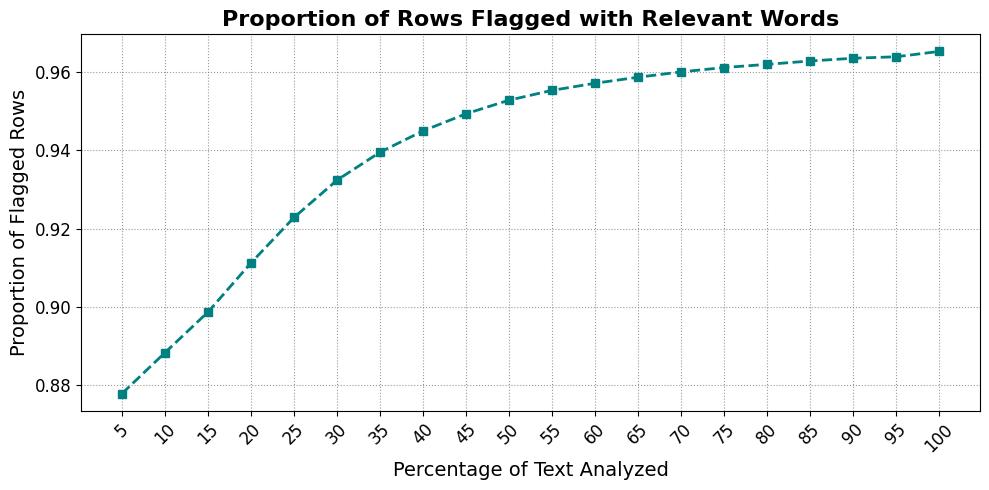

In [ ]:
# Set relevant words
rel_words = ['Artificial Intelligence', 'AI', 'Data Science', 'DS', 'Machine Learning', 'ML']

# Initialize list to store the ratios and the percentages
ratios = []
percentages = range(5, 101, 5)

# Iterate over the specified percentages
for percentage in percentages:
    df_temp = flag_rows_by_word(df.copy(), 'text', rel_words, percentage)
    ratio = df_temp['rel_flag'].sum() / len(df_temp['rel_flag'])
    ratios.append(ratio)

# Plotting the ratios
plt.figure(figsize=(10, 5))
plt.plot(percentages, ratios, marker='s', linestyle='--', color='teal', linewidth=2, markersize=6)
plt.title('Proportion of Rows Flagged with Relevant Words', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Text Analyzed', fontsize=14)
plt.ylabel('Proportion of Flagged Rows', fontsize=14)
plt.xticks(percentages, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle=':', color='gray', alpha=0.8)
plt.tight_layout()
plt.show()

Summary of the chart:
- For example: Among all the rows (articles), 94% of all the rows (articles) include at least one of the rel_words at the first 35% part of the article.
- 87% of rows (articles) include rel_words in the first 5% part of the article.
- Most rows (articles) include rel_words in the early part of the article.
- The line flattens out after 35% on x-axis. For a row (article), if no rel_words appears within first 35% of the text, I want to exclude the row (article) in my analytics.

In [ ]:
rel_words = ['Artificial Intelligence', 'AI', 'Data Science', 'DS', 'Machine Learning', 'ML']
percentage = 35

df = flag_rows_by_word(df, 'text', rel_words, percentage)
df_cleaned = df[df['rel_flag'] == 1]

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165538 entries, 0 to 200587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   url          165538 non-null  object
 1   date         165538 non-null  object
 2   language     165538 non-null  object
 3   title        165538 non-null  object
 4   text         165538 non-null  object
 5   token_count  165538 non-null  int64 
 6   rel_flag     165538 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 10.1+ MB


Check whether the title also contains related keywords.

In [ ]:
df_cleaned = flag_rows_by_word(df_cleaned, 'title', rel_words, percentage=100)

In [ ]:
# Exclude rows (articles) without rel_words in the title
df_cleaned = df_cleaned[df_cleaned['rel_flag'] == 1]

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153749 entries, 0 to 200587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   url          153749 non-null  object
 1   date         153749 non-null  object
 2   language     153749 non-null  object
 3   title        153749 non-null  object
 4   text         153749 non-null  object
 5   token_count  153749 non-null  int64 
 6   rel_flag     153749 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 9.4+ MB


### Are there any non English articles?

In [ ]:
# Check if any row in the column has non-English words (characters outside a-z and A-Z)
non_english_rows = df[df['text'].str.contains(r'[^a-zA-Z\s]', na=False)]

# Display rows with non-English words
print(non_english_rows.head(3))

                                                                                                       url  \
0  http://spaceref.com/astronomy/observation-simulation-and-ai-join-forces-to-reveal-a-clear-universe.html   
1                                                    http://www.agoravox.it/Covid-19-un-messaggio-dai.html   
2                                                                         http://www.dataweek.co.za/21690r   

         date language  \
0  2021-07-05       en   
1  2020-03-13       en   
2  2024-04-05       en   

                                                                                    title  \
0         Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef   
1  Covid-19 un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia   
2                               Flash for AI - 28 March 2024 - EBV Electrolink - Dataweek   

                                                                                 

In [ ]:
# Register LanguageDetector in spaCy's factory
@Language.factory("language_detector")
def create_language_detector(nlp, name):
    return LanguageDetector()

In [ ]:
# Load the model
nlp = spacy.load("en_core_web_sm")

# Add the registered LanguageDetector to the pipeline
nlp.add_pipe("language_detector")

# Process the text and detect the language
doc = nlp("This is an English text.")
print(doc._.language)

{'language': 'en', 'score': 0.9999967795520291}


In [ ]:
# Function to determine if the text is in English
def is_english(text):
    doc = nlp(text)
    return doc._.language['language'] == 'en'

# Wrapper function to apply the function to a specific column of a DataFrame
def apply_is_english(df, column):
    return df[df[column].apply(is_english)]

In [ ]:
# # Apply English filtering on both title and text
# df_cleaned_final = df_cleaned[df_cleaned['title'].apply(is_english) & df_cleaned['text'].apply(is_english)]

In [ ]:
df_cleaned['language'].value_counts()

,count
language,
en,153749


In [ ]:
df_cleaned_final = df_cleaned[df_cleaned['language'] == 'en']

In [ ]:
df_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153749 entries, 0 to 200587
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   url          153749 non-null  object
 1   date         153749 non-null  object
 2   language     153749 non-null  object
 3   title        153749 non-null  object
 4   text         153749 non-null  object
 5   token_count  153749 non-null  int64 
 6   rel_flag     153749 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 9.4+ MB


In [ ]:
df_cleaned_final.head()

,url,date,language,title,text,token_count,rel_flag
0,http://spaceref.com/astronomy/observation-simulation-and-ai-join-forces-to-reveal-a-clear-universe.html,2021-07-05,en,Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef,Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef Home NASA Watch SpaceRef Business Astrobiology Web Advertising Add an Event Sign up for our Daily Newsletter International Space Station NASA Hack Space Calendar Missions Space Weather Observation Simulation And AI Join Forces To Reveal A Clear Universe Press Release - Source NATIONAL INSTITUTES OF NATURAL SCIENCES Posted July 4 2021 1000 PM View Comments Using AI driven data analysis to peel back the noise and f...,912,1
1,http://www.agoravox.it/Covid-19-un-messaggio-dai.html,2020-03-13,en,Covid-19 un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia,Covid-19 un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia Accedi Partecipa ad AgoraVox Iscriviti e proponi un articolo Home page Attualit Ambiente Cronaca Cronaca Locale Cultura Economia Europa Media Istruzione Mondo Politica Salute Religione Societ Scienza e Tecnologia Tribuna Libera Di' la tua Tempo Libero Gossip Redazionali Concorsi Cinema FameTulipani Incredibile ma vero La vignetta del giorno Moda e tendenze Pubblicazioni AgoraVox Recensioni Satira Musica e ...,2039,1
2,http://www.dataweek.co.za/21690r,2024-04-05,en,Flash for AI - 28 March 2024 - EBV Electrolink - Dataweek,Flash for AI - 28 March 2024 - EBV Electrolink - Dataweek Home About us Back issues E-book PDF Subscribe Advertise EMP Handbook Categories Editor's Choice Multimedia Videos AI ML Analogue Mixed Signal LSI Circuit System Protection ComputerEmbedded Technology Design Automation DSP Micros Memory Edge Computing IIoT Electronics Technology Enclosures Racks Cabinets Panel Products Events Interconnection Manufacturing Production Technology Hardware Services News Opto-Electronics Passive Components...,2126,1
3,http://www.envirolink.org/2021/03/11/hundreds-of-sewage-leaks-detected-thanks-to-ai/,2021-03-11,en,Hundreds of sewage leaks detected thanks to AI - EnviroLink Network,Hundreds of sewage leaks detected thanks to AI - EnviroLink Network Home EnviroLink Forum About EnviroLink Thursday 11 March 2021 You are here Home 2021 March 11 Hundreds of sewage leaks detected thanks to AI Hundreds of sewage leaks detected thanks to AI Posted on March 11 2021 by EnviroLink Editor 0 Comments From BBC Shareclose Share pageCopy linkAbout sharing image copyrightRivers Trust Hundreds of previously unreported releases of raw sewage into UK rivers have been detected thanks to ar...,502,1
4,http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926,2020-08-07,en,Two dead as AI Express flight skids off Kozhikode airport,Two dead as AI Express flight skids off Kozhikode airportTopLoginSubscribeToggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGlobal EyeInlandRoutesBeaconInsightGame OnSafariTrendingCandid TalkGastronomyFact FilesMapping the states of IndiaXsunday-postbeyond-bygonesunday-postepic-powerfact-filesians-feedssundaypostin-retrospectmapping-the-states-of-indiapuja-specialReminiscencesponsoredsundaypostglobal-eyefeaturesnationworld...,263,1


In [ ]:
# Add unique id for rows
df_cleaned_final.insert(0, 'article_id', range(1, 1 + len(df_cleaned_final)))

In [ ]:
# Drop 'rel_flag'
df_cleaned_final = df_cleaned_final.drop('rel_flag', axis=1)

In [ ]:
# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/NLP_Ignas/nlp_finalproject/df_cleaned_final.csv'

In [ ]:
# Save the DataFrame as a CSV file
df_cleaned_final.to_csv(file_path, index=False)

In [ ]:
# Load the saved CSV file back into notebook as df_cleaned_final
df_cleaned_final = pd.read_csv(file_path)

In [ ]:
df_cleaned_final.head(5)

,article_id,url,date,language,title,text,token_count
0,1,http://spaceref.com/astronomy/observation-simulation-and-ai-join-forces-to-reveal-a-clear-universe.html,2021-07-05,en,Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef,Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef Home NASA Watch SpaceRef Business Astrobiology Web Advertising Add an Event Sign up for our Daily Newsletter International Space Station NASA Hack Space Calendar Missions Space Weather Observation Simulation And AI Join Forces To Reveal A Clear Universe Press Release - Source NATIONAL INSTITUTES OF NATURAL SCIENCES Posted July 4 2021 1000 PM View Comments Using AI driven data analysis to peel back the noise and f...,912
1,2,http://www.agoravox.it/Covid-19-un-messaggio-dai.html,2020-03-13,en,Covid-19 un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia,Covid-19 un messaggio dai ricercatori italiani ai colleghi stranieri - AgoraVox Italia Accedi Partecipa ad AgoraVox Iscriviti e proponi un articolo Home page Attualit Ambiente Cronaca Cronaca Locale Cultura Economia Europa Media Istruzione Mondo Politica Salute Religione Societ Scienza e Tecnologia Tribuna Libera Di' la tua Tempo Libero Gossip Redazionali Concorsi Cinema FameTulipani Incredibile ma vero La vignetta del giorno Moda e tendenze Pubblicazioni AgoraVox Recensioni Satira Musica e ...,2039
2,3,http://www.dataweek.co.za/21690r,2024-04-05,en,Flash for AI - 28 March 2024 - EBV Electrolink - Dataweek,Flash for AI - 28 March 2024 - EBV Electrolink - Dataweek Home About us Back issues E-book PDF Subscribe Advertise EMP Handbook Categories Editor's Choice Multimedia Videos AI ML Analogue Mixed Signal LSI Circuit System Protection ComputerEmbedded Technology Design Automation DSP Micros Memory Edge Computing IIoT Electronics Technology Enclosures Racks Cabinets Panel Products Events Interconnection Manufacturing Production Technology Hardware Services News Opto-Electronics Passive Components...,2126
3,4,http://www.envirolink.org/2021/03/11/hundreds-of-sewage-leaks-detected-thanks-to-ai/,2021-03-11,en,Hundreds of sewage leaks detected thanks to AI - EnviroLink Network,Hundreds of sewage leaks detected thanks to AI - EnviroLink Network Home EnviroLink Forum About EnviroLink Thursday 11 March 2021 You are here Home 2021 March 11 Hundreds of sewage leaks detected thanks to AI Hundreds of sewage leaks detected thanks to AI Posted on March 11 2021 by EnviroLink Editor 0 Comments From BBC Shareclose Share pageCopy linkAbout sharing image copyrightRivers Trust Hundreds of previously unreported releases of raw sewage into UK rivers have been detected thanks to ar...,502
4,5,http://www.millenniumpost.in/big-stories/ai-express-aircraft-skids-off-runaway-in-kozhikode-rescue-ops-on-414926,2020-08-07,en,Two dead as AI Express flight skids off Kozhikode airport,Two dead as AI Express flight skids off Kozhikode airportTopLoginSubscribeToggle navigationFeaturesDelhiKolkataNationOpinionEditorialBusinessSportsSunday PostBeyond BygoneEpic PowerIn RetrospectGlobal EyeInlandRoutesBeaconInsightGame OnSafariTrendingCandid TalkGastronomyFact FilesMapping the states of IndiaXsunday-postbeyond-bygonesunday-postepic-powerfact-filesians-feedssundaypostin-retrospectmapping-the-states-of-indiapuja-specialReminiscencesponsoredsundaypostglobal-eyefeaturesnationworld...,263


In [ ]:
df_cleaned_final['date'] = pd.to_datetime(df_cleaned_final['date'], infer_datetime_format = True)
df_cleaned_final['year'] = df_cleaned_final['date'].dt.year

In [ ]:
df_cleaned_final['year'].value_counts(dropna = False)

,count
year,
2023,69629
2024,38143
2022,19330
2021,15003
2020,11644


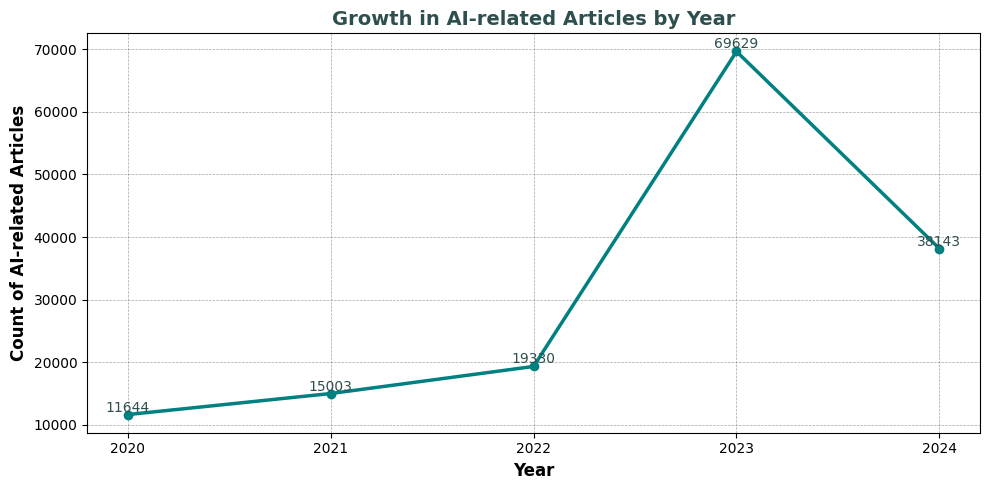

In [ ]:
import matplotlib.pyplot as plt

# Extracting the counts of articles by year from the DataFrame and sorting by year
year_counts = df_cleaned_final['year'].value_counts(dropna=False).sort_index()

# Plotting the line chart with enhanced aesthetics
plt.figure(figsize=(10, 5))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', linewidth=2.5, color='teal')

# Adding aesthetic improvements
plt.xlabel("Year", fontsize=12, fontweight='bold')
plt.ylabel("Count of AI-related Articles", fontsize=12, fontweight='bold')
plt.title("Growth in AI-related Articles by Year", fontsize=14, fontweight='bold', color='darkslategray')
plt.xticks(year_counts.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlighting data points
for x, y in zip(year_counts.index, year_counts.values):
    plt.text(x, y, f"{y}", ha='center', va='bottom', fontsize=10, color='darkslategray')

plt.tight_layout()
plt.show()